# 2_causal_analysis
Generate and visualize synthetic transactions

In [1]:
import pandas as pd
import numpy as np
import dowhy
from dowhy import CausalModel
import matplotlib.pyplot as plt
import os

# Load the synthetic dataset
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
DATA_PATH = os.path.join(BASE_DIR, "data", "processed", "synthetic_transactions.csv")
df = pd.read_csv(DATA_PATH, parse_dates=["date"])

df.head()


c:\Users\ksush\anaconda3\envs\dynprice\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,transaction_id,city_tier,category,base_price,discount_percent,final_price,purchased,margin_after_discount,date
0,1,Tier-3,Beauty,2276.341399,10,2048.707259,0,227.634140,2024-03-12
1,2,Tier-3,Groceries,443.428731,15,376.914422,1,22.171437,2024-01-16
2,3,Tier-1,Electronics,1614.994807,0,1614.994807,0,322.998961,2024-04-11
3,4,Tier-3,Groceries,1374.655499,15,1168.457174,1,68.732775,2024-05-22
4,5,Tier-3,Beauty,2324.660628,10,2092.194565,0,232.466063,2024-08-04


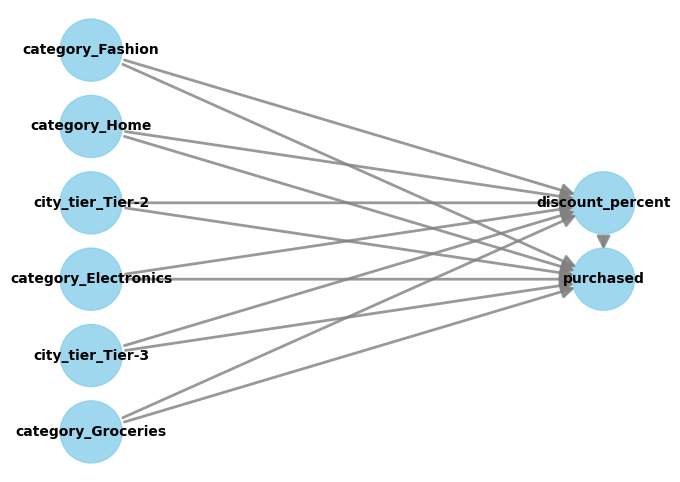

In [2]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=["city_tier", "category"], drop_first=True)

# Define causal model
from dowhy import CausalModel

model = CausalModel(
    data=df_encoded,
    treatment="discount_percent",
    outcome="purchased",
    common_causes=[col for col in df_encoded.columns if col.startswith("city_tier_") or col.startswith("category_")]
)

# Optional: visualize causal graph (requires Graphviz)
try:
    model.view_model()
except:
    print("Graphviz not installed, skipping graph visualization.")


In [3]:
# Identify causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print("Estimand:")
print(identified_estimand)

# Estimate effect using linear regression
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)

print("\nCausal Effect of Discount on Purchase Rate: ", causal_estimate.value)


Estimand:
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                     ↪
───────────────────(E[purchased|category_Fashion,category_Groceries,city_tier_ ↪
d[discount_percent]                                                            ↪

↪                                                             
↪ Tier-3,category_Electronics,category_Home,city_tier_Tier-2])
↪                                                             
Estimand assumption 1, Unconfoundedness: If U→{discount_percent} and U→purchased then P(purchased|discount_percent,category_Fashion,category_Groceries,city_tier_Tier-3,category_Electronics,category_Home,city_tier_Tier-2,U) = P(purchased|discount_percent,category_Fashion,category_Groceries,city_tier_Tier-3,category_Electronics,category_Home,city_tier_Tier-2)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estiman

c:\Users\ksush\anaconda3\envs\dynprice\lib\site-packages\dowhy\causal_estimators\regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
